<a href="https://colab.research.google.com/github/VijayaBhargavi198/Customer-segmentation/blob/main/k_means_without_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [ ]:

#reading the dataset as CSV file, dataset is taken from kaggle
customers_df = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
cluster_data = customers_df[['Age','Spending Score (1-100)']]
X = cluster_data['Age']
Y = cluster_data['Spending Score (1-100)']

In [ ]:
import random
import math
#choosing random centroids from the dataset
def random_centroids(number_of_centroids, dataset_size):
    x_value = list()
    y_value = list()

    for i in range(number_of_centroids):
        j = random.randint(1, dataset_size-1)
        x_value.append(X[j])
        y_value.append(Y[j]) 
    centroids = {"x": x_value, "y":y_value}
    return centroids

# function for centroid definition
number_of_centroids = 5
centroids = random_centroids(number_of_centroids, len(X))

# This function to calculate the eucledian distance from each point to each centroid 
def distance_from_centroids(centroid, point_x, point_y):
    centroid_distances = dict()
    def eucledian_distance(x1, y1, x2, y2):
     return math.sqrt(pow((x1-x2),2) + pow((y1-y2),2))
    for i in range(len(centroid["x"])):         
        centroid_distances[i] = [eucledian_distance(centroid["x"][i], centroid["y"][i], point_x[j], point_y[j]) for j in range(len(X)) ]
    return centroid_distances


# This function takes the mean distance of each cluster's points
def mean_distance(df, x, y):
    return df.groupby("cluster").mean()[["x", "y"]]

#The main kmeans function
def kmeans(centroids, x, y):
    difference = 1
    i = 0
    while (difference!=0):
        centroid_distances = distance_from_centroids(centroids, x, y)
        df = pd.DataFrame()
        df.iloc[0:0]
        df = pd.DataFrame(distance_from_centroids(centroids, X, y))
        df['cluster'] = df.idxmin(axis=1)
        df["x"] = x
        df["y"] = y
        new_centroids = mean_distance(df, x, y) 
        difference = (new_centroids["x"] - centroids["x"]).sum() + (new_centroids["y"] - centroids["y"]).sum()
        centroids = new_centroids
        i+=1
        
    return df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


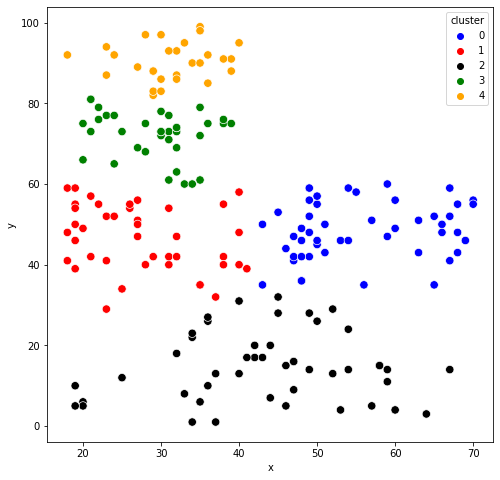

In [ ]:
# This is for plotting the final clustering
df_new = kmeans(centroids, X, Y)
pyplot.figure(figsize=(8, 8))
sns.scatterplot(df_new['x'], df_new['y'], hue=df_new['cluster'], palette=["blue",'red','black', "green", "orange"], s=70)